In [1]:
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [2]:
model_no_augmentation = tf.keras.models.load_model (r"C:\Users\Jones\OneDrive - UT Arlington\Desktop\jones\Studies\Haridev\New P\final_model.keras")
model_with_augmentation = tf.keras.models.load_model(r"C:\Users\Jones\OneDrive - UT Arlington\Desktop\jones\Studies\Haridev\New P\model_with_augmentation_final.keras")


In [3]:
# import os
# import shutil
# import numpy as np

# # Define paths
# data_dir = r'C:\Users\Jones\OneDrive - UT Arlington\Desktop\jones\Studies\Haridev\New P\PetImages'
# test_dir = os.path.join(data_dir, 'test')

# # Make sure the test directory exists
# os.makedirs(test_dir, exist_ok=True)

# # Define how many images you want to move to the test set
# num_test_samples = 50  # The number of images per class to add to the test set

# # Loop over each class directory
# for class_folder in os.listdir(data_dir):
#     class_dir = os.path.join(data_dir, class_folder)
    
#     # Skip if it's not a directory
#     if not os.path.isdir(class_dir) or class_folder == 'test':
#         continue
    
#     # Create a corresponding directory in the test directory
#     test_class_dir = os.path.join(test_dir, class_folder)
#     os.makedirs(test_class_dir, exist_ok=True)
    
#     # Get all image file names for this class
#     images = [img for img in os.listdir(class_dir) if img.lower().endswith(('png', 'jpg', 'jpeg'))]
#     # Randomly select images to move to the test set
#     test_images = np.random.choice(images, size=num_test_samples, replace=False)
    
#     # Move the selected images to the test directory
#     for img in test_images:
#         src_path = os.path.join(class_dir, img)
#         dest_path = os.path.join(test_class_dir, img)
#         shutil.move(src_path, dest_path)

# print("Test data split completed.")


In [4]:
# Set parameters for dataset loading
image_size = (224, 224)
batch_size = 32 

test_data_path = 'C:/Users/Jones/OneDrive - UT Arlington/Desktop/jones/Studies/Haridev/New P/test'

# Load the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_path,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,  # It's important to not shuffle during evaluation to maintain label order
    label_mode='binary'  # Use 'binary' if your test data is also binary classification
)

Found 100 files belonging to 2 classes.


In [5]:
# Predict probabilities on the test set with both models
predictions_no_augmentation = model_no_augmentation.predict(test_ds)
predictions_with_augmentation = model_with_augmentation.predict(test_ds)

true_labels = tf.concat([y for x, y in test_ds], axis=0)


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


In [6]:
fpr_no_aug, tpr_no_aug, _ = roc_curve(true_labels, predictions_no_augmentation)
fpr_with_aug, tpr_with_aug, _ = roc_curve(true_labels, predictions_with_augmentation)


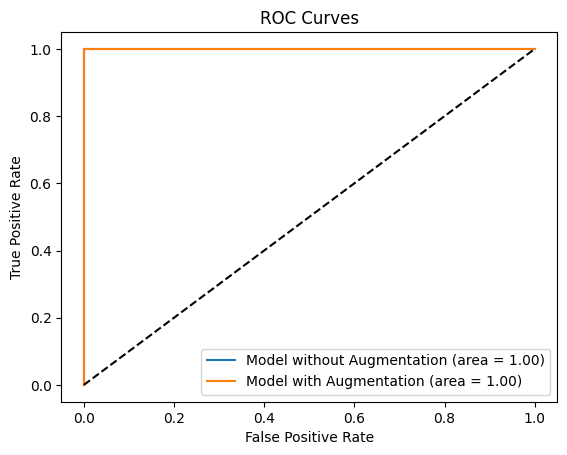

In [7]:
plt.figure()
plt.plot(fpr_no_aug, tpr_no_aug, label='Model without Augmentation (area = %0.2f)' % auc(fpr_no_aug, tpr_no_aug))
plt.plot(fpr_with_aug, tpr_with_aug, label='Model with Augmentation (area = %0.2f)' % auc(fpr_with_aug, tpr_with_aug))
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()
